# Imports

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import json

# Fetching dataset

In [2]:
glass_identification = fetch_ucirepo(id=42)
dataset = glass_identification.data.original

In [3]:
class_dict = {
    1: "building_windows_float_processed",
    2: "building_windows_non_float_processed",
    3: "vehicle_windows_float_processed",
    4: "vehicle_windows_non_float_processed",
    5: "containers",
    6: "tableware",
    7: "headlamps"
}

# Data exploration

In [4]:
dataset.shape

(214, 11)

In [5]:
dataset.head(20)

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [6]:
dataset.drop(columns=['Id_number'], inplace=True)

In [7]:
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
dataset.groupby('Type_of_glass').size()

Type_of_glass
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

C:\Users\matig\AppData\Local\Temp\ipykernel_6916\1062197002.py:2: UserWarning: When passing multiple axes, layout keyword is ignored.
  dataset.plot(kind='box', subplots=True, layout=(2, 5), sharex=False, sharey=False, ax=axes)


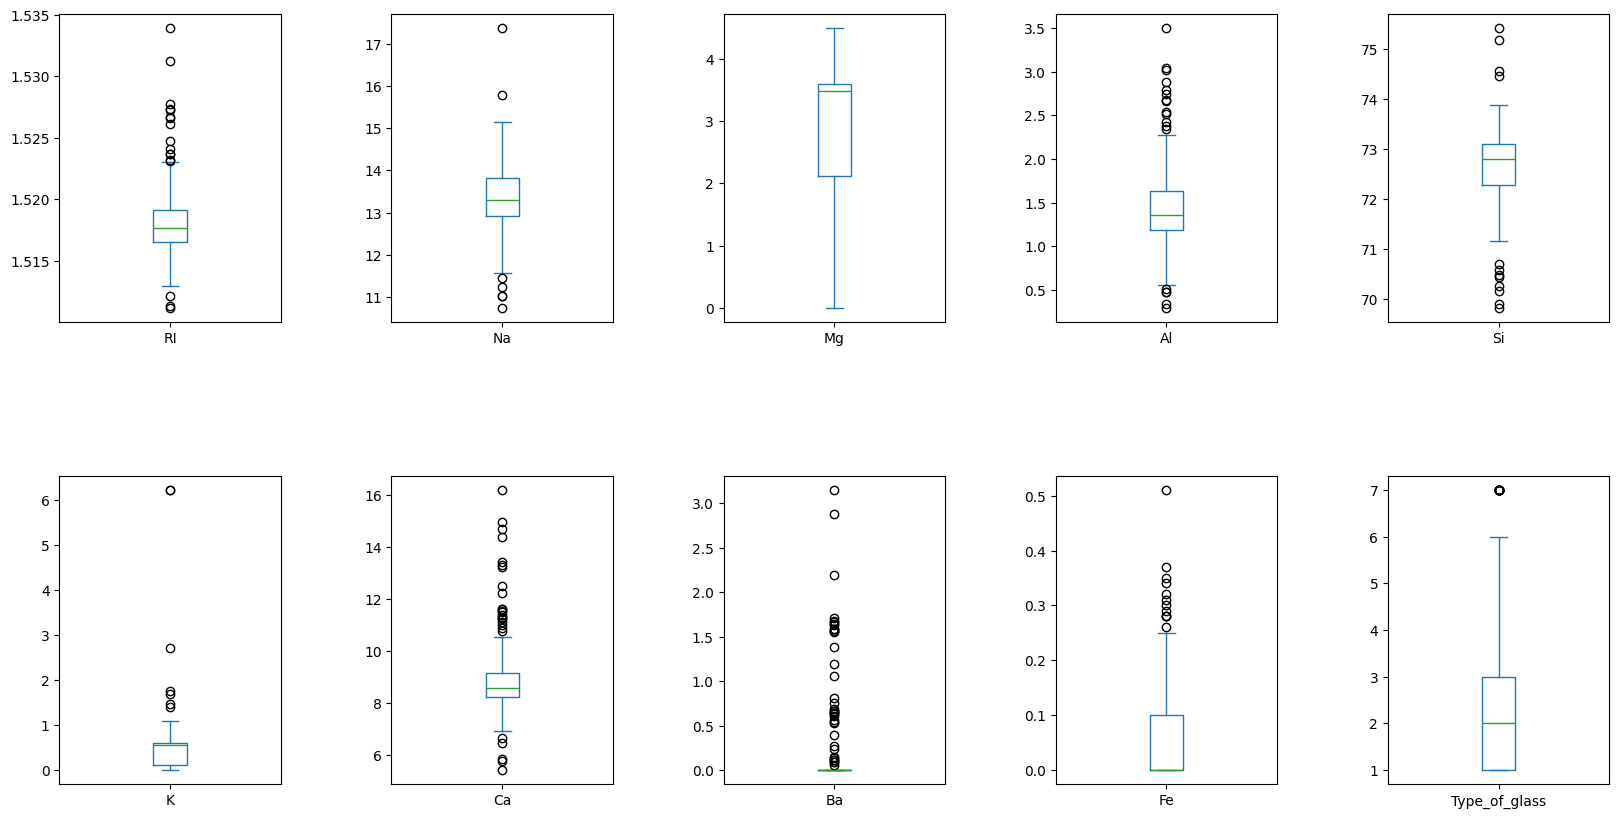

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust figsize to make subplots larger
dataset.plot(kind='box', subplots=True, layout=(2, 5), sharex=False, sharey=False, ax=axes)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()

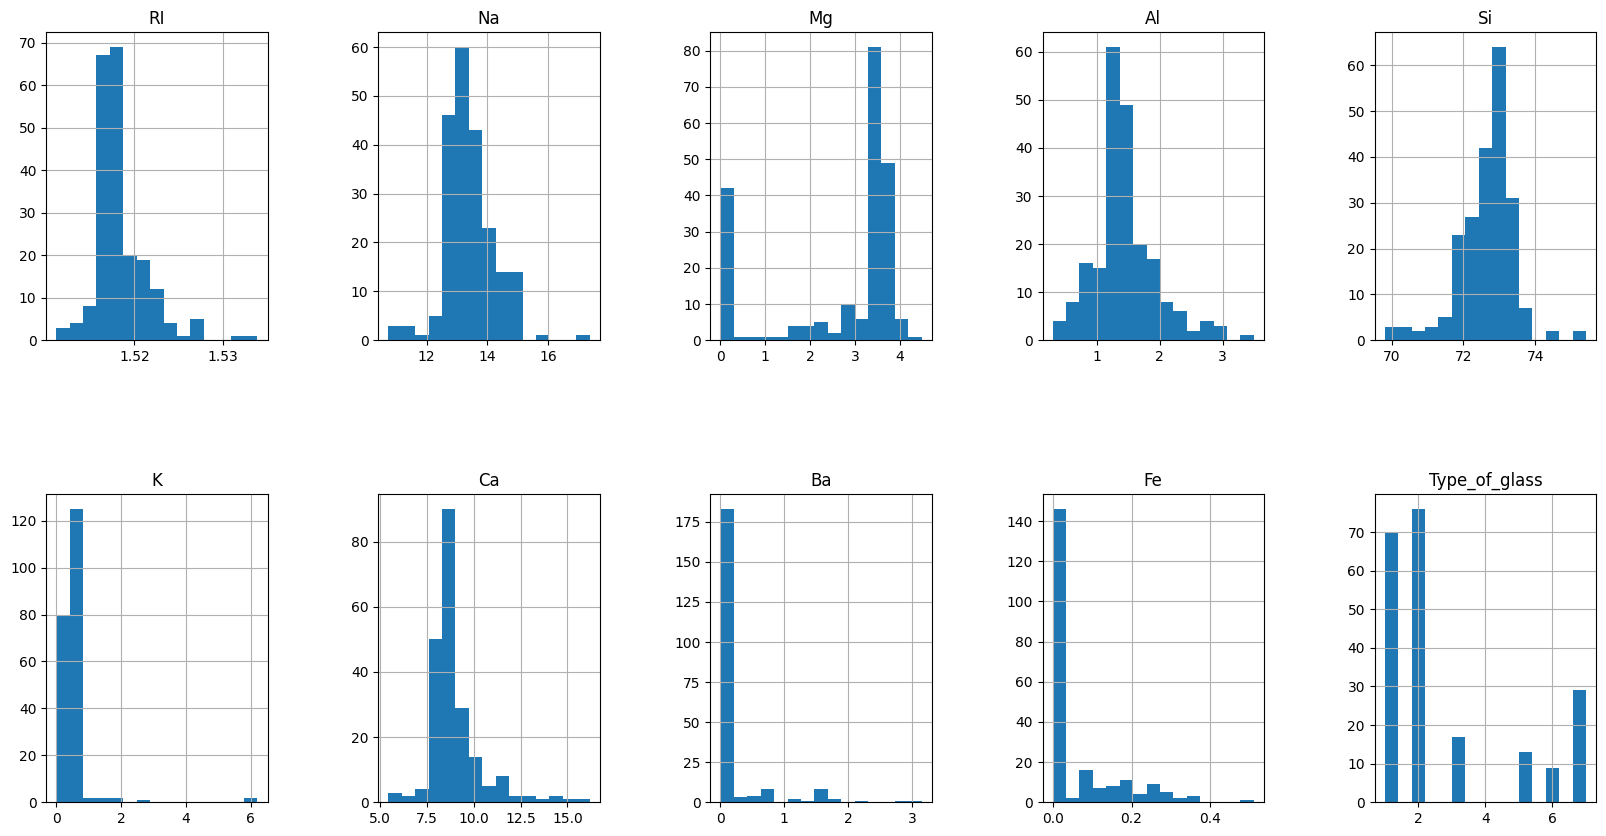

In [10]:
# Create the histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust figsize to make subplots larger
dataset.hist(ax=axes, bins=15)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()


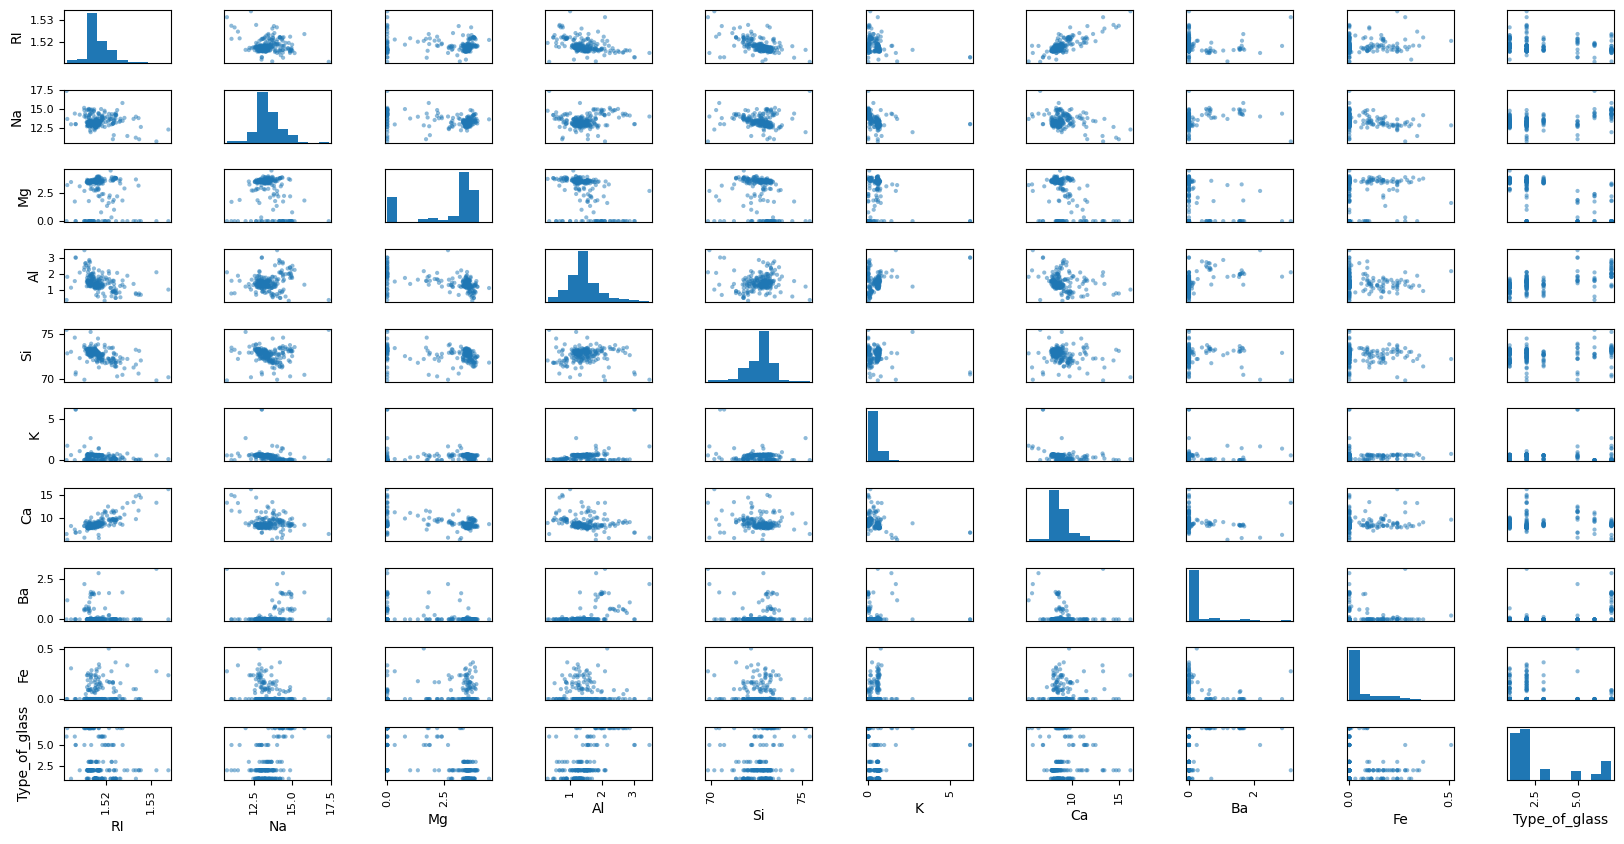

In [11]:
# Create the scatter plot matrix
scatter_matrix_fig = scatter_matrix(dataset, figsize=(20, 10), diagonal='hist')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust hspace and wspace as needed

# Show the plot
plt.show()

# Data preprocessing

In [12]:
x = glass_identification.data.features
y = glass_identification.data.targets

Normalization

In [13]:
normalizer = Normalizer()
x_normalized = normalizer.fit_transform(x)
x_normalized = pandas.DataFrame(x_normalized, columns=x.columns, index=x.index)

In [14]:
x_normalized.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.020373,0.179893,0.036079,0.019389,0.974684,0.006695,0.120183,0.002353,0.000766
std,0.000214,0.010981,0.019395,0.006734,0.002748,0.008941,0.019227,0.006722,0.001311
min,0.019452,0.146107,0.000000,0.003909,0.960172,0.000000,0.072963,0.000000,0.000000
25%,0.020258,0.173025,0.028478,0.015932,0.973149,0.001663,0.110382,0.000000,0.000000
50%,0.020338,0.178892,0.046603,0.018337,0.975522,0.007438,0.115211,0.000000,0.000000
75%,0.020479,0.186234,0.048366,0.021840,0.976717,0.008155,0.124221,0.000000,0.001343
max,0.021270,0.223717,0.060884,0.048796,0.979958,0.085825,0.221568,0.043756,0.006890


Scaling

In [15]:
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled = pandas.DataFrame(x_scaled, columns=x.columns, index=x.index)

In [16]:
x_scaled.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [17]:
x_datasets = {
    "original": x,
    "normalized": x_normalized,
    "scaled": x_scaled
}

# Train/test split

In [18]:
seed = 42
test_size = 0.2

data_splited = {key : train_test_split(x_set, y, test_size=test_size, random_state=seed, stratify=y) for key, x_set in x_datasets.items()}


# Classifiers comparison

In [19]:
classifers = [
    (GaussianNB, [
        {'var_smoothing': 1e-9},
        {'var_smoothing': 1e-8},
        {'var_smoothing': 1e-10}
    ]),
    (DecisionTreeClassifier, [
        {
            'class_weight': None,
            'criterion': 'log_loss',
            'splitter': 'random',
            'max_depth': None,
            'random_state': seed
        },
        {
            'class_weight': 'balanced',
            'criterion': 'entropy',
            'splitter': 'random',
            'max_depth': 5,
            'random_state': seed
        },
        {
            'class_weight': 'balanced',
            'criterion': 'gini',
            'splitter': 'best',
            'max_depth': None,
            'random_state': seed
        }
    ])
]

In [20]:
results = []

for classifier_type, param_configurations in classifers:
    for params in param_configurations:
        for preprocessing, (x_train, x_test, y_train, y_test) in data_splited.items():
            classifier = classifier_type(**params)
            classifier.fit(x_train, y_train)
            predictions = classifier.predict(x_test)
            
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
            recall = recall_score(y_test, predictions, average='weighted')
            f1 = f1_score(y_test, predictions, average='weighted')
            conf_matrix = confusion_matrix(y_test, predictions, labels=list(class_dict.keys()))
            class_report = classification_report(y_test, predictions, output_dict=True, zero_division=0)
            
            result = {
                'classifier_type': classifier_type.__name__,
                'params': params,
                'preprocessing': preprocessing,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'confusion_matrix': conf_matrix,
                'classification_report': class_report

            }
            
            results.append(result)

results_df = pandas.DataFrame(results)
results_df

d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Studia\Semestr 6\Sztuczna Inteligencja\machine_learning\.venv\Lib\site-packages

,classifier_type,params,preprocessing,accuracy,precision,recall,f1_score,confusion_matrix,classification_report
0,GaussianNB,{'var_smoothing': 1e-09},original,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
1,GaussianNB,{'var_smoothing': 1e-09},normalized,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
2,GaussianNB,{'var_smoothing': 1e-09},scaled,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
3,GaussianNB,{'var_smoothing': 1e-08},original,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
4,GaussianNB,{'var_smoothing': 1e-08},normalized,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
5,GaussianNB,{'var_smoothing': 1e-08},scaled,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
6,GaussianNB,{'var_smoothing': 1e-10},original,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
7,GaussianNB,{'var_smoothing': 1e-10},normalized,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
8,GaussianNB,{'var_smoothing': 1e-10},scaled,0.511628,0.476744,0.511628,0.450592,"[[12, 1, 1, 0, 0, 0, 0], [9, 2, 1, 0, 0, 2, 1]...","{'1': {'precision': 0.5, 'recall': 0.857142857..."
9,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'log_loss'...",original,0.674419,0.699165,0.674419,0.676007,"[[9, 4, 1, 0, 0, 0, 0], [3, 8, 2, 0, 1, 1, 0],...","{'1': {'precision': 0.75, 'recall': 0.64285714..."


In [21]:
def transform_params(params):
    return '; '.join([f'{k}: {v}' for k, v in params.items()])

results_subtable = results_df.loc[:, "classifier_type":"f1_score"]
results_subtable['params'] = results_subtable['params'].apply(transform_params)
pandas.set_option('display.max_colwidth', None)
results_subtable

,classifier_type,params,preprocessing,accuracy,precision,recall,f1_score
0,GaussianNB,var_smoothing: 1e-09,original,0.511628,0.476744,0.511628,0.450592
1,GaussianNB,var_smoothing: 1e-09,normalized,0.511628,0.476744,0.511628,0.450592
2,GaussianNB,var_smoothing: 1e-09,scaled,0.511628,0.476744,0.511628,0.450592
3,GaussianNB,var_smoothing: 1e-08,original,0.511628,0.476744,0.511628,0.450592
4,GaussianNB,var_smoothing: 1e-08,normalized,0.511628,0.476744,0.511628,0.450592
5,GaussianNB,var_smoothing: 1e-08,scaled,0.511628,0.476744,0.511628,0.450592
6,GaussianNB,var_smoothing: 1e-10,original,0.511628,0.476744,0.511628,0.450592
7,GaussianNB,var_smoothing: 1e-10,normalized,0.511628,0.476744,0.511628,0.450592
8,GaussianNB,var_smoothing: 1e-10,scaled,0.511628,0.476744,0.511628,0.450592
9,DecisionTreeClassifier,class_weight: None; criterion: log_loss; splitter: random; max_depth: None; random_state: 42,original,0.674419,0.699165,0.674419,0.676007


In [22]:
pandas.set_option('display.max_rows', None)

# Create an empty list to store rows
new_rows = []

# Transform 'classification_report'
for index, row in results_df.iterrows():
    classification_report = row['classification_report']
    for class_key, class_metrics in classification_report.items():
        # Check if class_metrics is a dictionary
        if isinstance(class_metrics, dict):
            new_row = {
                'classifier_type': row['classifier_type'],
                'params': str(row['params']),
                'preprocessing': row['preprocessing'],
                'class': class_key,
                'accuracy': class_metrics['precision'],
                'precision': class_metrics['precision'],
                'recall': class_metrics['recall'],
                'f1_score': class_metrics['f1-score'],
                'support': class_metrics['support']
            }
            new_rows.append(new_row)
        else:
            print(f"Issue with classification_report for row {index}: class_metrics is not a dictionary.")

# Create a new DataFrame from the list of rows
new_results_df = pandas.DataFrame(new_rows)

# Reorder columns
new_results_df = new_results_df[['classifier_type', 'params', 'preprocessing', 'class', 'accuracy', 'precision', 'recall', 'f1_score', 'support']]

# Set 'class' as an additional index
new_results_df.set_index(['classifier_type', 'params', 'preprocessing', 'class'], inplace=True)

# Show the new DataFrame
new_results_df



Issue with classification_report for row 0: class_metrics is not a dictionary.
Issue with classification_report for row 1: class_metrics is not a dictionary.
Issue with classification_report for row 2: class_metrics is not a dictionary.
Issue with classification_report for row 3: class_metrics is not a dictionary.
Issue with classification_report for row 4: class_metrics is not a dictionary.
Issue with classification_report for row 5: class_metrics is not a dictionary.
Issue with classification_report for row 6: class_metrics is not a dictionary.
Issue with classification_report for row 7: class_metrics is not a dictionary.
Issue with classification_report for row 8: class_metrics is not a dictionary.
Issue with classification_report for row 9: class_metrics is not a dictionary.
Issue with classification_report for row 10: class_metrics is not a dictionary.
Issue with classification_report for row 11: class_metrics is not a dictionary.
Issue with classification_report for row 12: class

accuracy  \
classifier_type        params                                                                                                         preprocessing class                    
GaussianNB             {'var_smoothing': 1e-09}                                                                                       original      1             0.500000   
                                                                                                                                                    2             0.400000   
                                                                                                                                                    3             0.000000   
                                                                                                                                                    5             0.500000   
                                                                                                                                                    6             0.500000   
                                                                                                                                                    7             0.833333   
                                                                                                                                                    macro avg     0.455556   
                                                                                                                                                    weighted avg  0.476744   
                                                                                                                                      normalized    1             0.500000   
                                                                                                                                                    2             0.400000   
                                                                                                                                                    3             0.000000   
                                                                                                                                                    5             0.500000   
                                                                                                                                                    6             0.500000   
                                                                                                                                                    7             0.833333   
                                                                                                                                                    macro avg     0.455556   
                                                                                                                                                    weighted avg  0.476744   
                                                                                                                                      scaled        1             0.500000   
                                                                                                                                                    2             0.400000   
                                                                                                                                                    3             0.000000   
                                                                                                                                                    5             0.500000   
                                                                                                                                                    6             0.500000   
                                                                                                                                                    7           

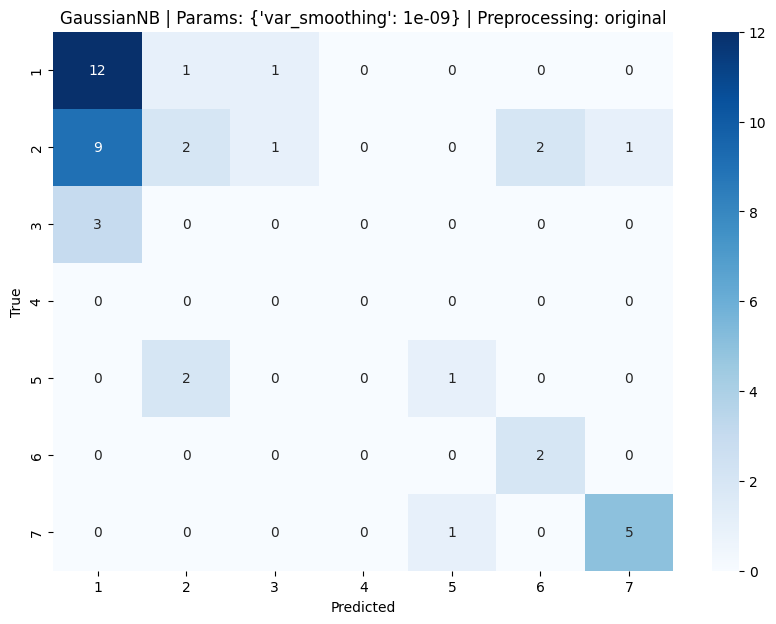

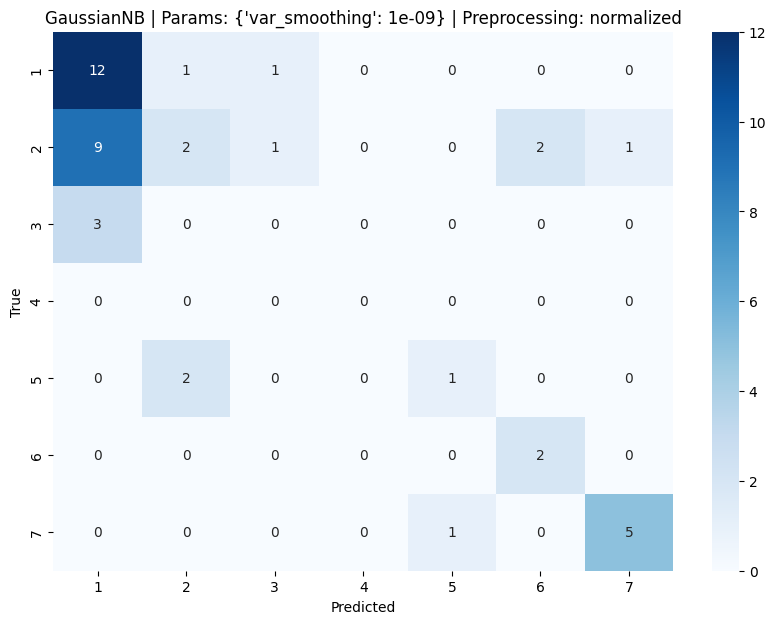

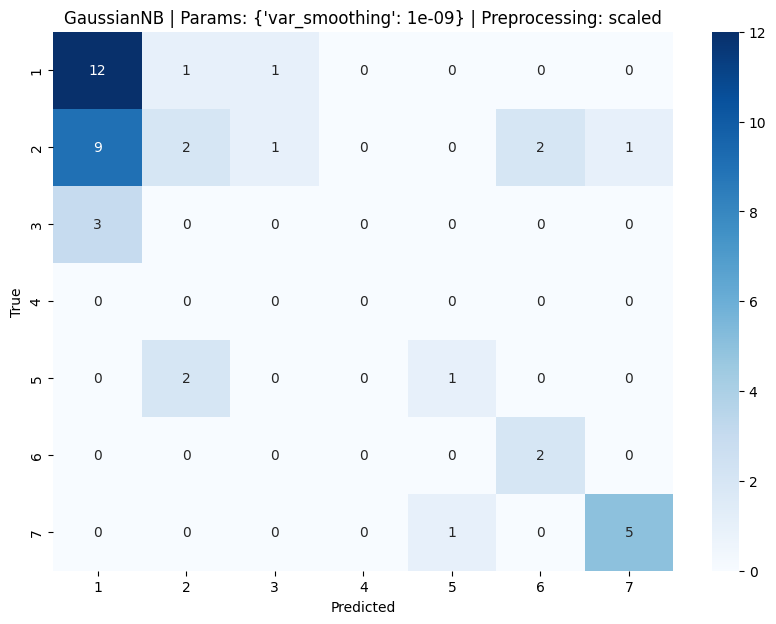

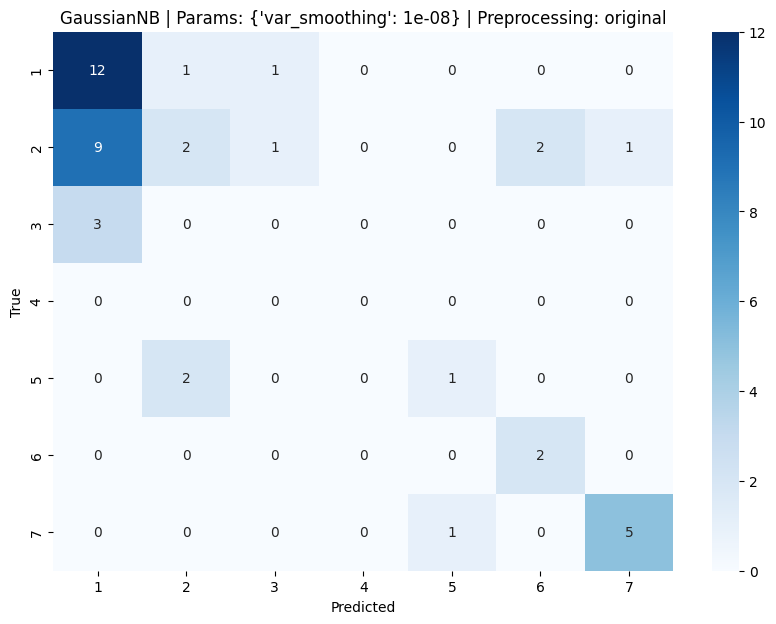

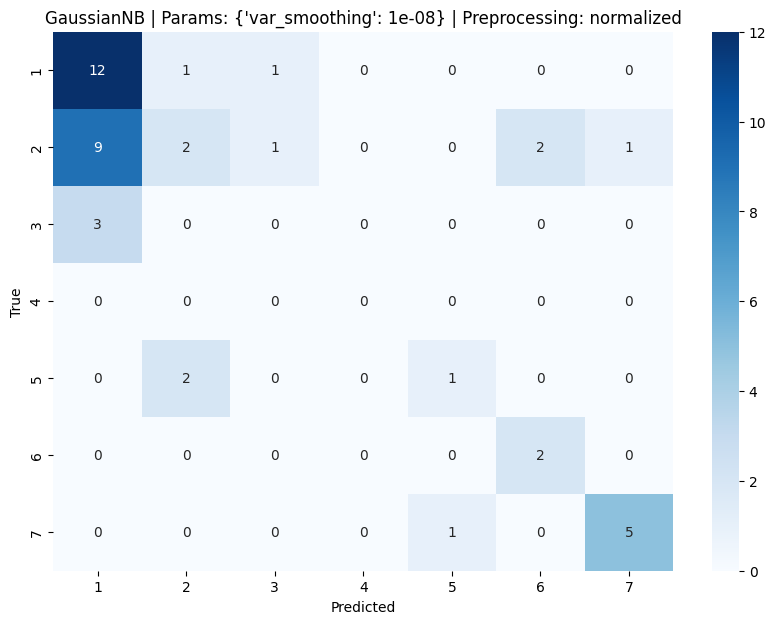

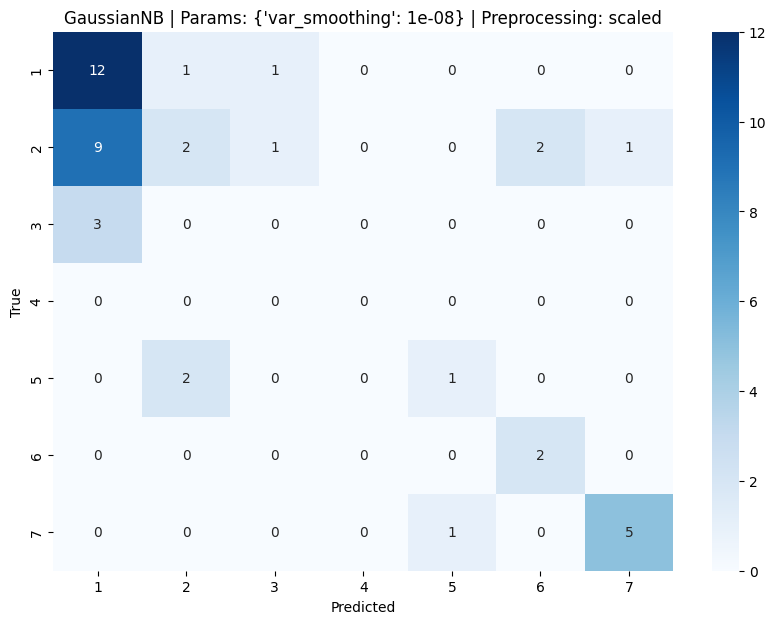

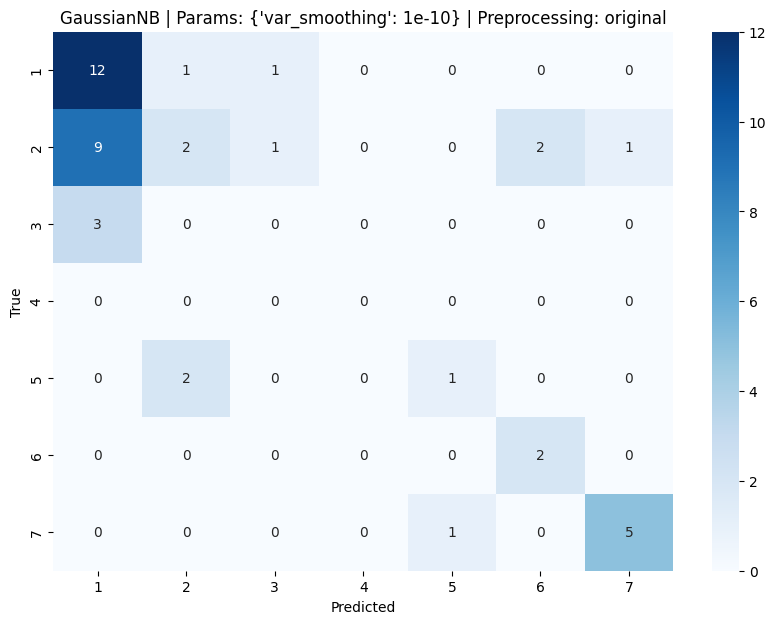

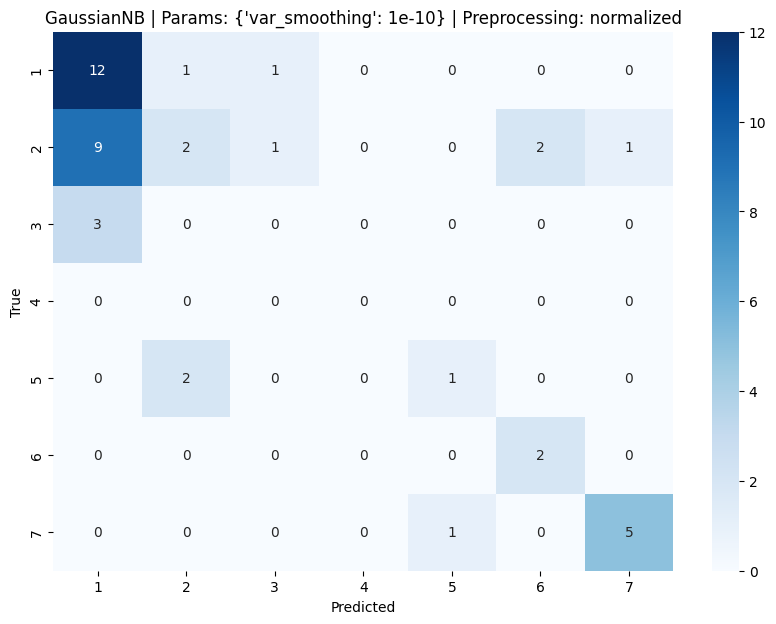

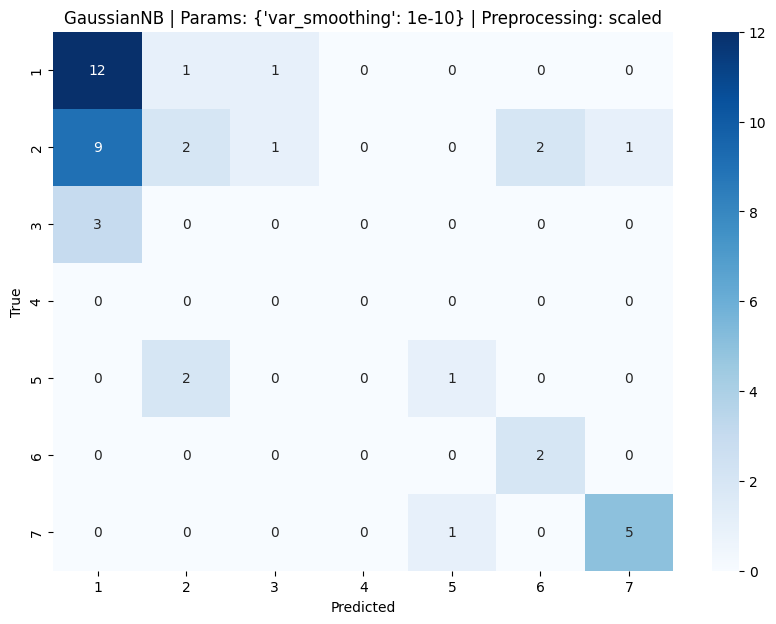

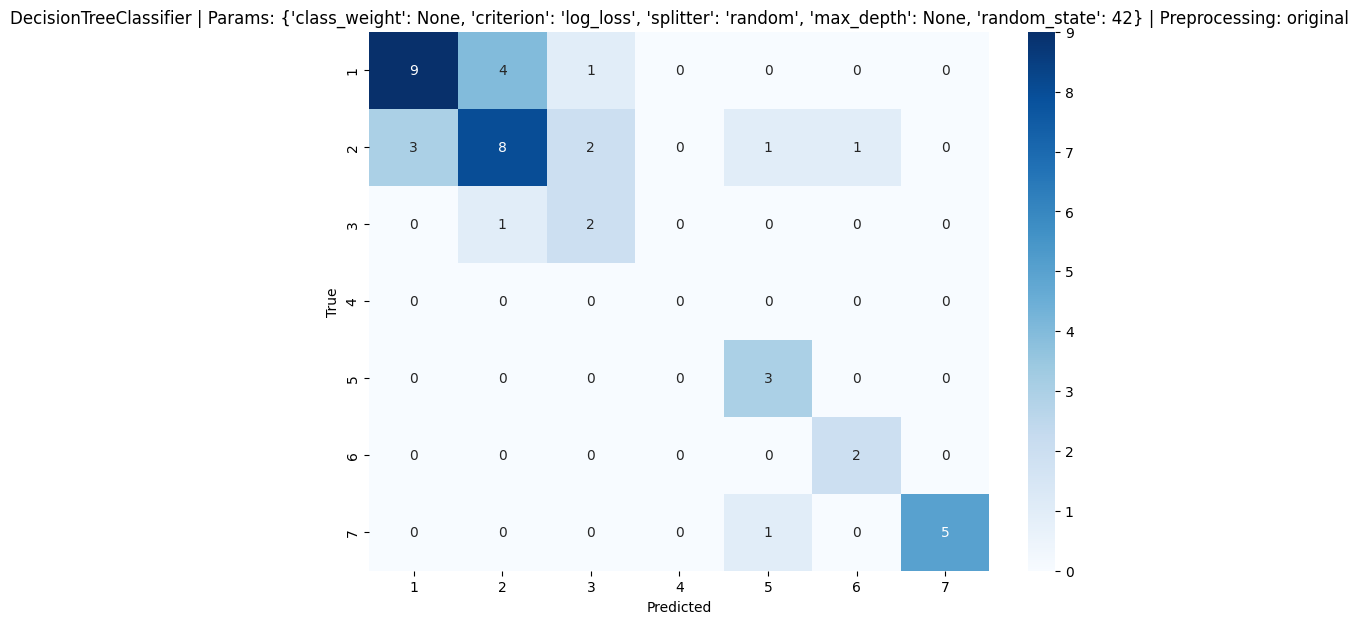

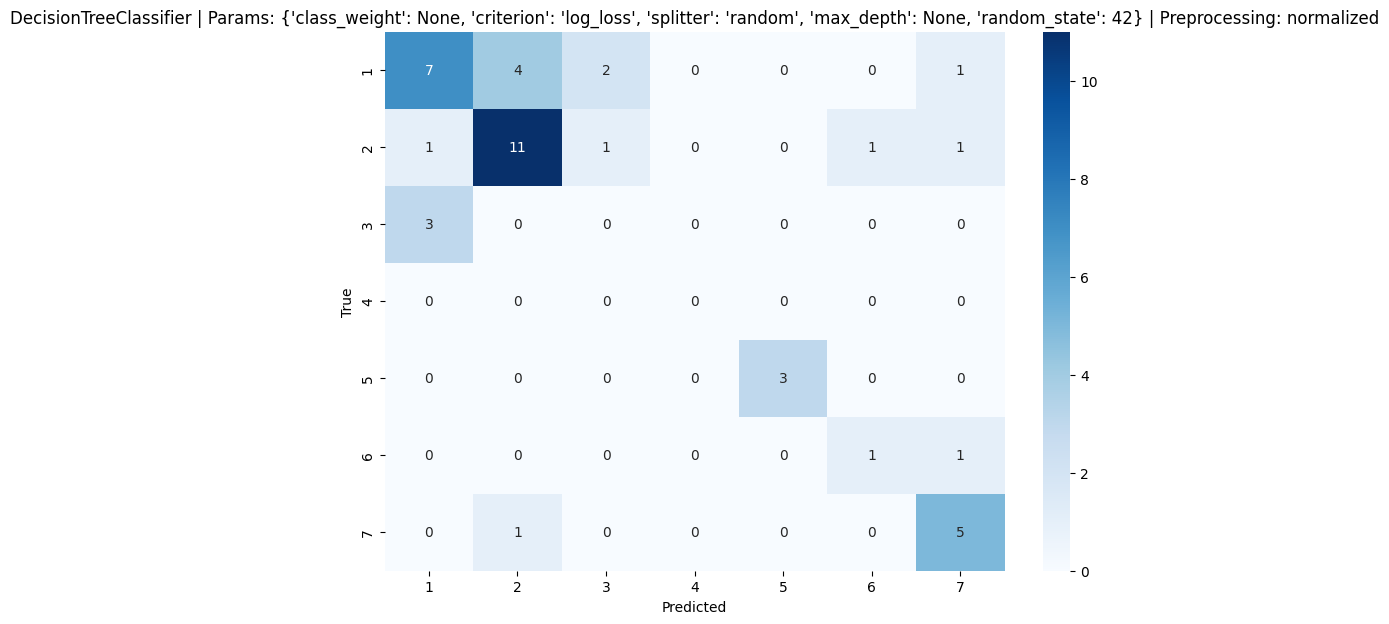

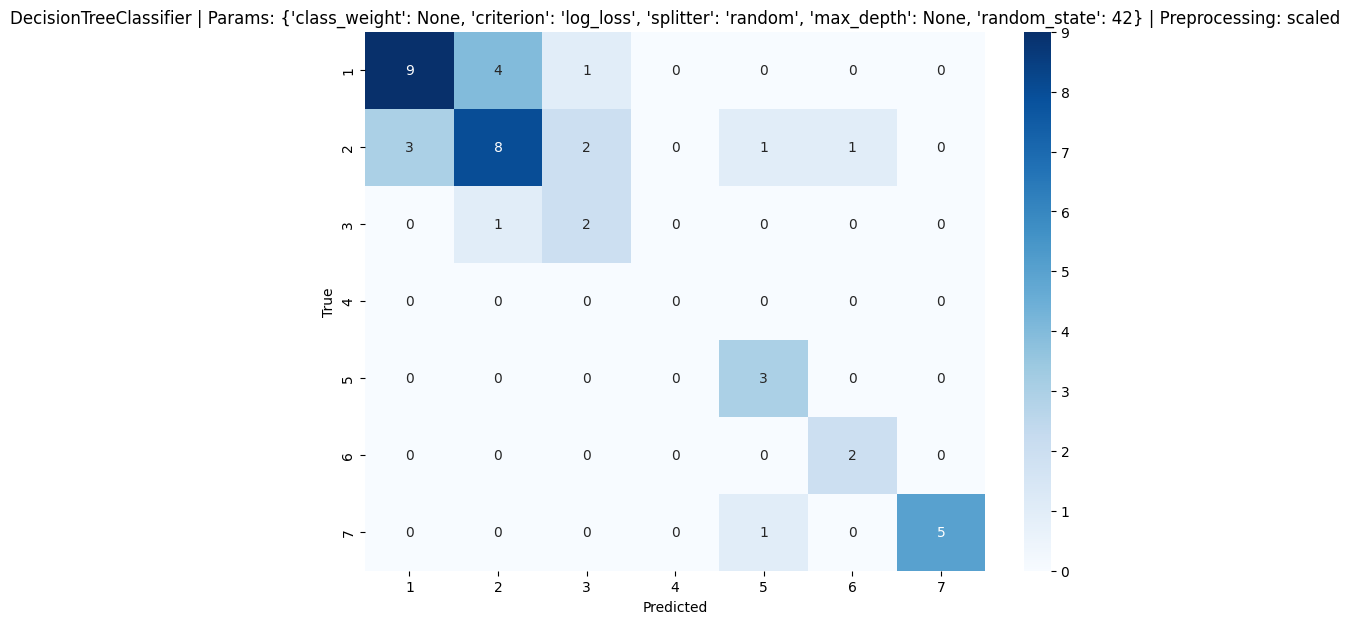

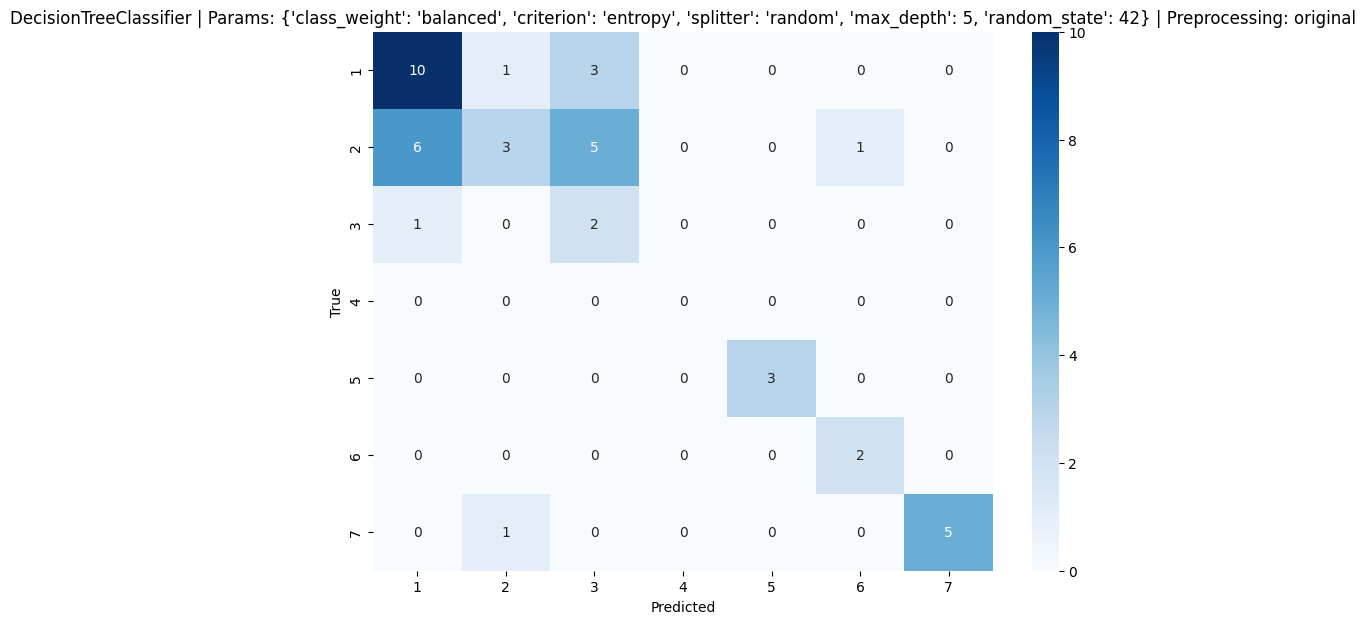

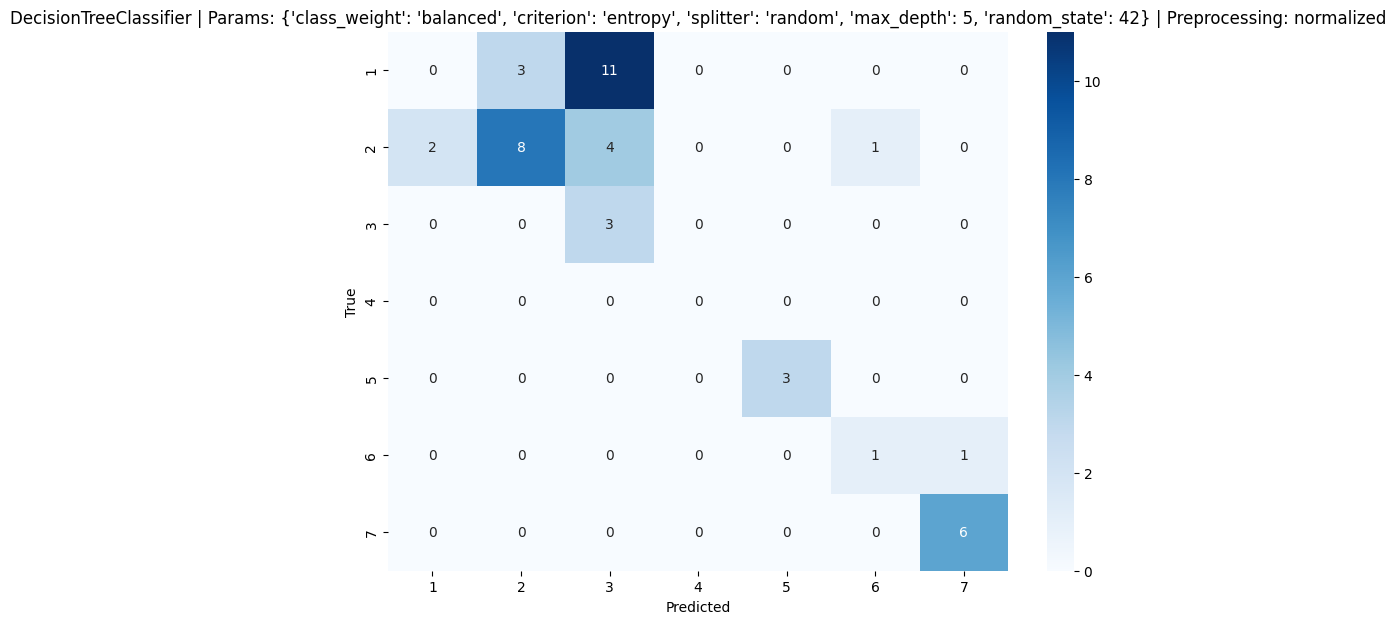

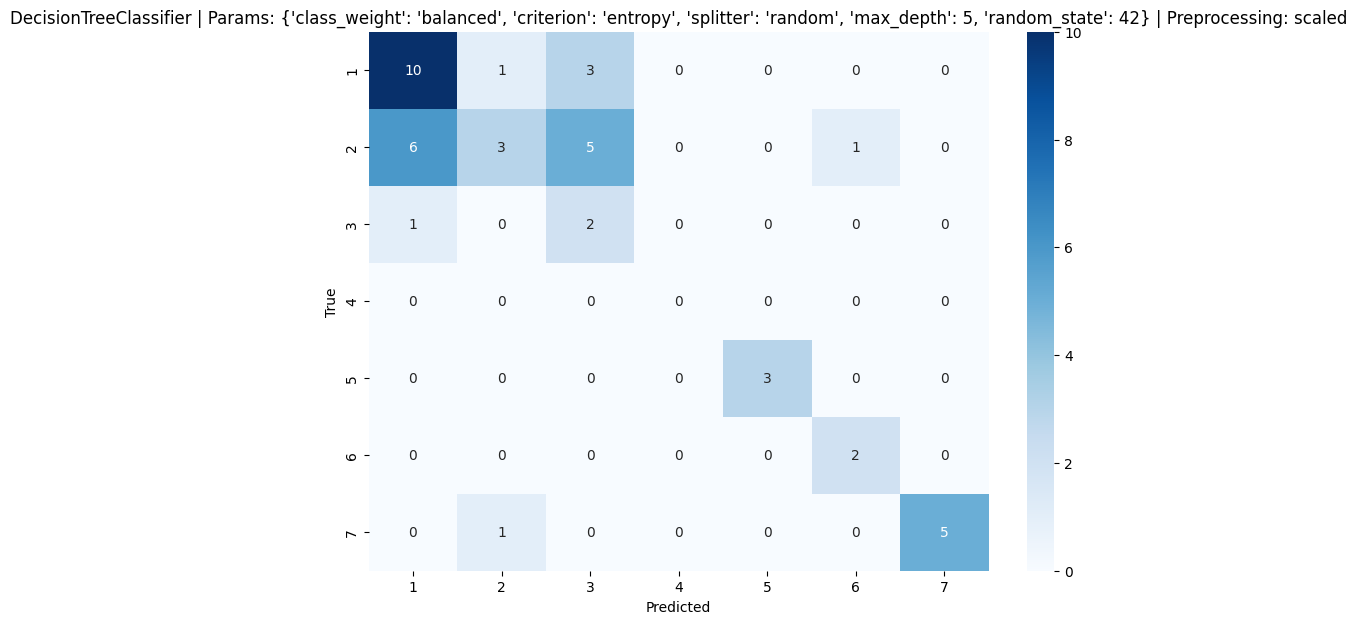

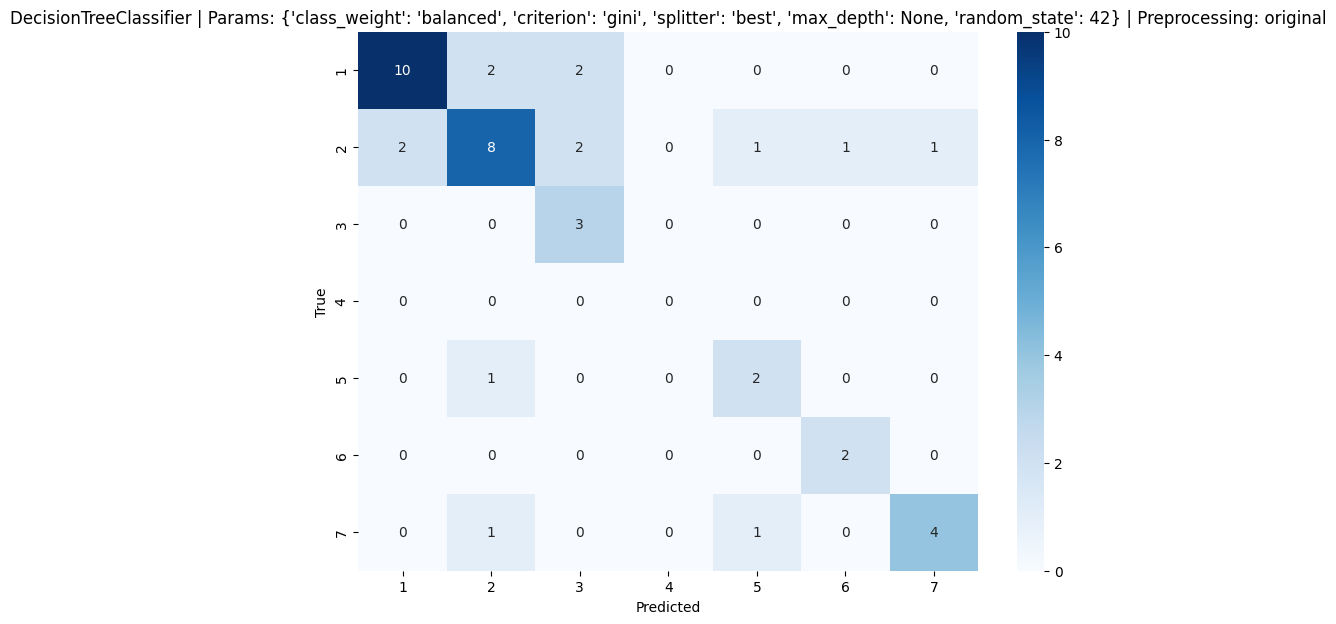

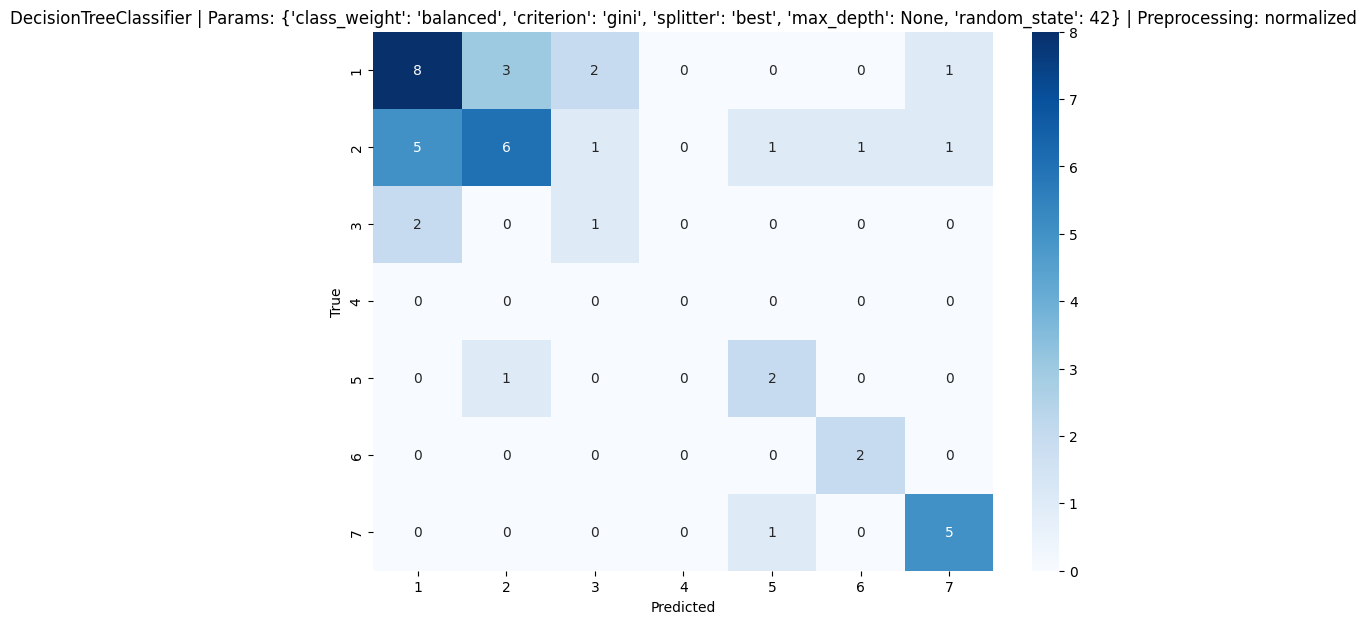

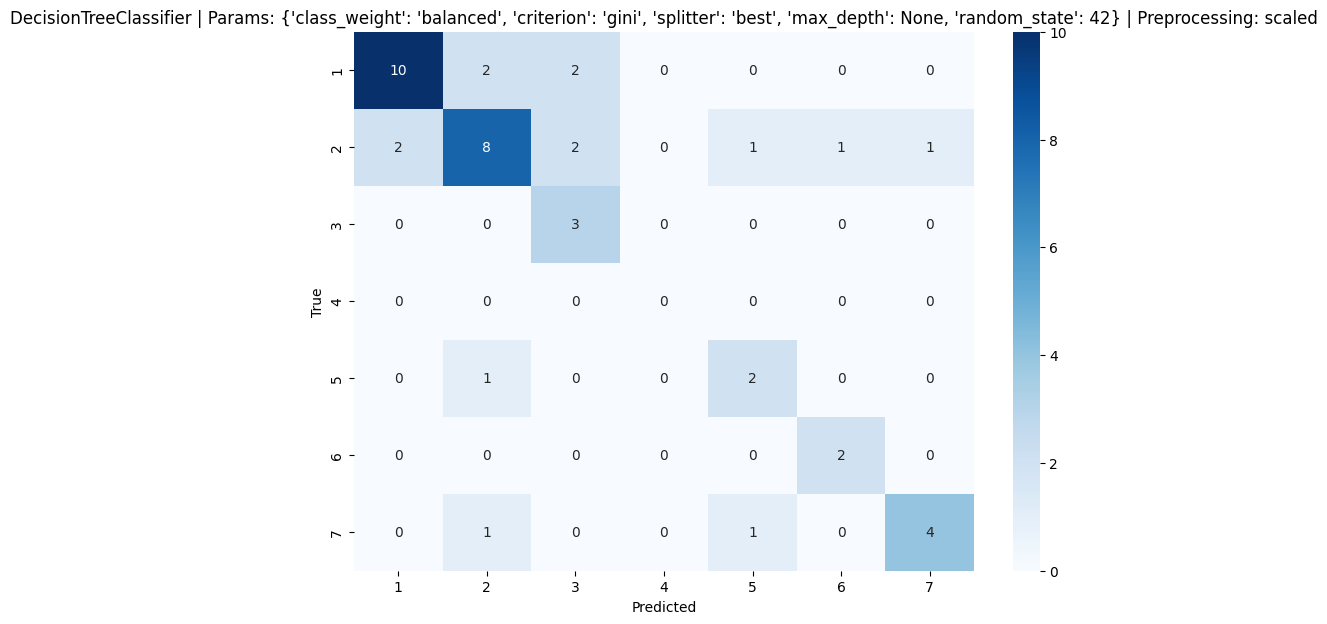

In [24]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices
for result in results:
    title = f"{result['classifier_type']} | Params: {result['params']} | Preprocessing: {result['preprocessing']}"
    plot_confusion_matrix(result['confusion_matrix'], title, labels=class_dict.keys())

**Precyzja (precision)** to odsetek prawidłowo sklasyfikowanych przykładów wśród wszystkich przypisanych do danej klasy.  
**Czułość (recall)** to odsetek prawidłowo zidentyfikowanych przykładów danej klasy w stosunku do wszystkich rzeczywistych przykładów tej klasy.   
**Miara F1 (F1 score)** to średnia harmoniczna precyzji i czułości, będąca wskaźnikiem równoważącym te dwa parametry.  
**Ogólna dokładność (accuracy)** to odsetek wszystkich prawidłowo sklasyfikowanych przykładów.  

Dla klasyfikacji przy użyciu **DecisionTreeClassifier**, **skalowanych danych** oraz hiperparametrów **{'class_weight': 'balanced', 'criterion': 'gini', 'splitter': 'best', 'max_depth': None, 'random_state': 42}** uzyskano najlepsze wyniki.  

Opis poszczególnych hiperparametrów i ich wartości:  

**class_weight**: **'balanced'**: Ustawia wagi klas na wartości odwrotnie proporcjonalne do ich częstości występowania w danych treningowych, co pomaga w radzeniu sobie z niezbalansowanymi zbiorami danych.  
**criterion**: **'gini'**: Używa wskaźnika Gini'ego do oceny jakości podziałów. Jest to miara nierównomierności rozkładu klasy, która preferuje bardziej jednorodne podziały.  
**splitter**: **'best'**: Wybiera najlepszy podział w każdym węźle. Alternatywą jest 'random', który losowo wybiera podział spośród kandydatów.  
**max_depth**: **None**: Brak limitu głębokości drzewa, co pozwala drzewu rosnąć do pełnej głębokości, aż wszystkie liście będą czyste lub będą zawierać mniej niż min_samples_split próbek.  
**random_state**: 42: Ustawia ziarno generatora liczb losowych, co zapewnia powtarzalność wyników przy każdej replikacji modelu.  

Ogólne wyniki modelu były zadowalające. Model osiągnął średnią dokładność 0.649, precyzję 0.649, czułość 0.763 i miarę F1 wynoszącą 0.677. Wartości te wskazują na stosunkowo dobrą skuteczność modelu w klasyfikowaniu danych. Średnie ważone wartości precyzji, czułości i miary F1 wyniosły odpowiednio 0.711, 0.674 i 0.678, co sugeruje, że model radził sobie dobrze w kontekście różnych klas, choć były pewne różnice w wynikach dla poszczególnych klas.  

Najlepsze wyniki model osiągnął dla klasy 1, gdzie precyzja wyniosła 0.833, czułość 0.714, a miara F1 0.769, co świadczy o dużej trafności modelu w identyfikowaniu przykładów tej klasy. Klasa 1 była sklasyfikowana bardzo dokładnie, co oznacza, że model dobrze radził sobie z rozpoznawaniem przykładów tej klasy przy minimalnej liczbie błędów.  

Najgorsze wyniki zanotowano dla klasy 3, gdzie precyzja wyniosła jedynie 0.429, mimo że czułość była na poziomie 1.000, co wskazuje, że model zidentyfikował wszystkie rzeczywiste przykłady tej klasy, ale jednocześnie wygenerował dużą liczbę fałszywie pozytywnych wyników. Niska precyzja oznacza, że model miał trudności z dokładnym rozpoznaniem tej klasy, co skutkowało niską wartością miary F1 wynoszącą 0.600.  

Podsumowując, model DecisionTreeClassifier ze skalowanymi danymi oraz hiperparametrami: {'class_weight': 'balanced', 'criterion': 'gini', 'splitter': 'best', 'max_depth': None, 'random_state': 42}, wykazał się ogólnie dobrymi wynikami, szczególnie w przypadku klasy 1, ale miał trudności z dokładną klasyfikacją przykładów klasy 3. Wyniki te sugerują, że choć model jest skuteczny, istnieje potencjał do dalszej optymalizacji, szczególnie w kontekście klas o niskiej precyzji.  